# Library imports

In [216]:
#usual imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Outliers 
from scipy import stats

In [223]:
data = pd.read_csv('data/raw/Walmart_Store_sales.csv')

In [224]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [225]:
print(f'There is {data.shape[0]} rows and {data.shape[1]} columns in this dataset')
print(f'Columns in this dataset {list(data.columns)}')
print(f'Overall missing values: \n{100*data.isnull().sum()/data.shape[0]}')

There is 150 rows and 8 columns in this dataset
Columns in this dataset ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
Overall missing values: 
Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64


In [226]:
data.dtypes

Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [227]:
data['Store'].value_counts()

3.0     15
1.0     11
18.0    10
13.0     9
5.0      9
14.0     9
19.0     9
17.0     8
8.0      8
2.0      8
7.0      8
20.0     7
4.0      7
6.0      7
10.0     5
12.0     5
16.0     4
9.0      4
15.0     4
11.0     3
Name: Store, dtype: int64

There is no missing values on the stores, we can convert it to an integer

In [228]:
data.dtypes

Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [166]:
data['Store'] = data['Store'].astype(int)
data.head(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858


In [167]:
data['Holiday_Flag'].isnull().sum()

12

In [168]:
data[data['Holiday_Flag'].isnull()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
15,6,30-04-2010,1498080.16,NaN,68.91,2.780,211.894272,7.092
43,7,26-08-2011,629994.47,NaN,57.60,3.485,194.379637,8.622
48,1,05-08-2011,1624383.75,NaN,91.65,3.684,215.544618,7.962
53,14,25-03-2011,1879451.23,NaN,41.76,3.625,184.994368,8.549
65,10,NaN,1714309.90,NaN,43.43,3.287,127.191774,8.744
73,1,27-08-2010,1449142.92,NaN,85.22,2.619,211.567306,7.787
90,9,09-07-2010,485389.15,NaN,78.51,2.642,214.656430,6.442
109,1,09-12-2011,NaN,NaN,43.93,3.158,218.961846,7.866
118,9,18-06-2010,513073.87,NaN,82.99,2.637,215.016648,6.384


# Re-assess Holiday_Flag column

In [169]:
#Holidays = 27/08/2010 Lyndon Baines Jonhson Day in Texas will be transformed to 1 in Holiday_Flag
#The rest of the dates are not holidays according to the national register so we'll transform them to 0

In [170]:
data.loc[data.Date == "27-08-2010", "Holiday_Flag"] = 1.0

In [171]:
data['Holiday_Flag'].isnull().sum()

11

In [172]:
data['Holiday_Flag'] = data['Holiday_Flag'].replace(np.nan, 1.0)

In [173]:
data['Holiday_Flag'].isnull().sum()

0

In [174]:
days = data['Holiday_Flag'].value_counts()[0]
holidays = data['Holiday_Flag'].value_counts()[1]

print(f'There is {days} normal days in the dataset')
print(f'There is {holidays} holidays in the dataset')

There is 126 normal days in the dataset
There is 24 holidays in the dataset


In [175]:
data = data.dropna(subset=['Weekly_Sales'])

In [176]:
#Drop the nan values in Temperature/Fuel Price/CPI/Unemployment

In [177]:
data = data.dropna(subset=['Temperature','Fuel_Price','CPI','Unemployment'])

In [178]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,94.000000,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000
mean,9.989362,1.225783e+06,0.191489,61.609894,3.328021,177.324272,7.668170
std,6.084521,6.521680e+05,0.395583,17.819415,0.484910,40.093173,1.640716
min,1.000000,2.689290e+05,0.000000,18.790000,2.548000,126.114581,5.143000
25%,4.250000,5.652484e+05,0.000000,46.137500,2.826000,131.611710,6.664000
50%,9.500000,1.230197e+06,0.000000,62.020000,3.468000,193.605477,7.514500
75%,15.000000,1.804434e+06,0.000000,76.302500,3.737750,214.783750,8.150000
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000


# Computing confidence interval taking 99,73% 

In [179]:
y23 = [data.Temperature.mean()-3*data.Temperature.std(),data.Temperature.mean()+3*data.Temperature.std()]
y24 = [data.Fuel_Price.mean()-3*data.Fuel_Price.std(),data.Fuel_Price.mean()+3*data.Fuel_Price.std()]
y25 = [data.CPI.mean()-3*data.CPI.std(),data.CPI.mean()+3*data.CPI.std()]
y26 = [data.Unemployment.mean()-3*data.Unemployment.std(),data.Unemployment.mean()+3*data.Unemployment.std()]
print(f'Any values outside of this interval within Temperature will be removed {y23}')
print(f'Any values outside of this interval within Fuel price will be removed {y24}')
print(f'Any values outside of this interval within CPI will be removed {y25}')
print(f'Any values outside of this interval within Unemployment will be removed {y26}')

Any values outside of this interval within Temperature will be removed [8.151648380500326, 115.06813885354222]
Any values outside of this interval within Fuel price will be removed [1.873290574631704, 4.782751978559783]
Any values outside of this interval within CPI will be removed [57.04475382766958, 297.60378955956435]
Any values outside of this interval within Unemployment will be removed [2.7460221836717746, 12.590318241860135]


In [180]:
#Therefore we have to focus on the outliers in unemployment 

In [181]:
data.drop(data[data.Unemployment > y26[1]].index, inplace=True)

In [182]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,90.000000,9.000000e+01,90.000000,90.00000,90.000000,90.000000,90.000000
mean,9.900000,1.233865e+06,0.188889,61.06100,3.318444,179.524905,7.389733
std,6.204475,6.647250e+05,0.393613,17.74604,0.484399,39.554303,0.982729
min,1.000000,2.689290e+05,0.000000,18.79000,2.548000,126.128355,5.143000
25%,4.000000,5.617240e+05,0.000000,45.34250,2.814750,132.602339,6.642250
50%,9.000000,1.260826e+06,0.000000,61.45000,3.468000,197.166416,7.419000
75%,15.750000,1.807159e+06,0.000000,75.79250,3.737750,214.855374,8.099000
max,20.000000,2.771397e+06,1.000000,91.65000,4.170000,226.968844,9.342000


In [183]:
print(f'After cleaning, there is only {data.shape[0]} rows left, we dropped {(100-((data.shape[0])/150)*100)}%')

After cleaning, there is only 90 rows left, we dropped 40.0%


In [184]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6,18-02-2011,1572117.54,1.0,59.61,3.045,214.777523,6.858
1,13,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
4,6,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
6,15,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961


## EDA

In [214]:
store_sales = data.groupby('Store')['Weekly_Sales'].sum()
first_shop = store_sales.sort_values(ascending = False).index[0]
print(f'The shop n°{first_shop} sold the most over one week')

The shop n°13 sold the most over one week


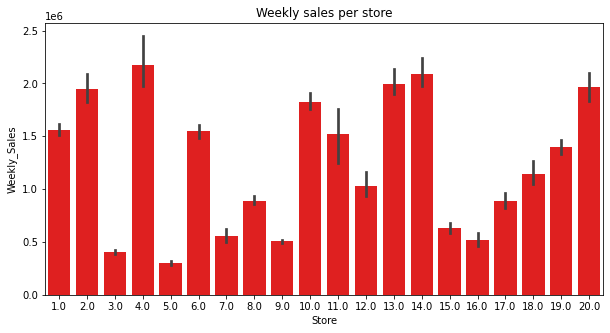

In [233]:
plt.figure(figsize = (10, 5))
g = sns.barplot(data = data, x = 'Store', y = 'Weekly_Sales', color = 'RED')
g.set_title("Weekly sales per store")
plt.show()

In [ ]:
#Even though the store #13 holds the record in the biggest weekly sale, 
#it isn't the best performance overall, #4 seems to be performing better (We have to take into account its 10^6)

In [215]:
data.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,0.140426,-0.180812,-0.322778,0.195787,-0.568758,0.285240
Weekly_Sales,0.140426,1.000000,0.030090,-0.091299,-0.018320,-0.373895,0.094047
Holiday_Flag,-0.180812,0.030090,1.000000,-0.034772,-0.283605,0.232909,0.010298
Temperature,-0.322778,-0.091299,-0.034772,1.000000,-0.035225,0.155212,-0.201256
Fuel_Price,0.195787,-0.018320,-0.283605,-0.035225,1.000000,-0.206546,-0.026149
CPI,-0.568758,-0.373895,0.232909,0.155212,-0.206546,1.000000,-0.205179
Unemployment,0.285240,0.094047,0.010298,-0.201256,-0.026149,-0.205179,1.000000


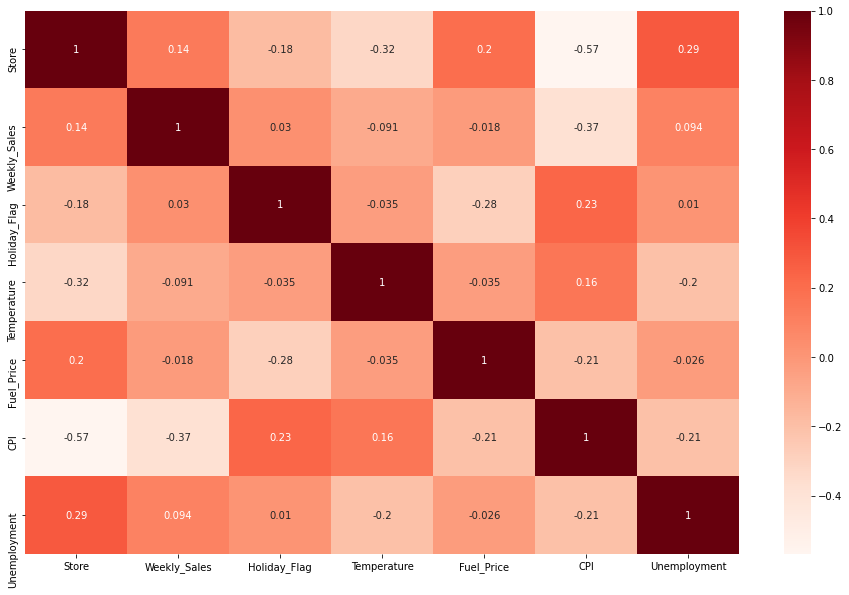

In [219]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(), cmap = 'Reds', annot = True)
plt.show()

As we're speaking of sales, we can take into account two factors, the first would be the week aka date, when there are sales. The second factor could be the quarters as any financial firm would assess their performance.

However, we dropped the date column, it could be a way of fine tuning our model, this could be explored in the future


In [220]:
data = data[['Store','Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]

In [222]:
#data.to_csv('./data/walmart_store_cleaned.csv', index = False)